In [10]:
import pandas as pd

In [11]:
tripData = pd.read_parquet('Data/yellow_tripdata.parquet', engine='pyarrow')

In [12]:
tripData.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,249,107,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0
1,2,2022-10-01 00:14:30,2022-10-01 00:19:48,2.0,0.72,1.0,N,151,238,2,5.5,0.5,0.5,0.00,0.0,0.3,9.30,2.5,0.0
2,2,2022-10-01 00:27:13,2022-10-01 00:37:41,1.0,1.74,1.0,N,238,166,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.0,0.0
3,1,2022-10-01 00:32:53,2022-10-01 00:38:55,0.0,1.30,1.0,N,142,239,1,6.5,3.0,0.5,2.05,0.0,0.3,12.35,2.5,0.0
4,1,2022-10-01 00:44:55,2022-10-01 00:50:21,0.0,1.00,1.0,N,238,166,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,0.0,0.0


In [13]:
# Converting parquet data to csv
# tripData.to_csv('Data/yellow_tripdata.csv', index=False)

In [14]:
# # Reading the CSV Data 
# tripData = pd.read_csv('Data/yellow_tripdata.csv')

In [15]:
# # Solving the datawaring 
# tripData = pd.read_csv('Data/yellow_tripdata.csv', dtype={'VendorID':'int64', 'tpep_pickup_datetime':'object',
#                                                     'tpep_dropoff_datetime':'object',
#                                                     'passenger_count' :'float64','trip_distance':'float64',
#                                                     'RatecodeID':'float64','store_and_fwd_flag':'object',
#                                                     'PULocationID':'int64','DOLocationID':'int64','payment_type':'int64',
#                                                     'fare_amount':'float64','extra' :'float64','mta_tax':'float64',
#                                                     'tip_amount':'float64','tolls_amount':'float64',
#                                                     'improvement_surcharge':'float64','total_amount':'float64',
#                                                     'congestion_surcharge':'float64','airport_fee':'float64'})

In [16]:
tripData.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,249,107,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0
1,2,2022-10-01 00:14:30,2022-10-01 00:19:48,2.0,0.72,1.0,N,151,238,2,5.5,0.5,0.5,0.00,0.0,0.3,9.30,2.5,0.0
2,2,2022-10-01 00:27:13,2022-10-01 00:37:41,1.0,1.74,1.0,N,238,166,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.0,0.0
3,1,2022-10-01 00:32:53,2022-10-01 00:38:55,0.0,1.30,1.0,N,142,239,1,6.5,3.0,0.5,2.05,0.0,0.3,12.35,2.5,0.0
4,1,2022-10-01 00:44:55,2022-10-01 00:50:21,0.0,1.00,1.0,N,238,166,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,0.0,0.0


In [17]:
print(tripData.count())
print(tripData.dtypes)

VendorID                 3675411
tpep_pickup_datetime     3675411
tpep_dropoff_datetime    3675411
passenger_count          3542390
trip_distance            3675411
RatecodeID               3542390
store_and_fwd_flag       3542390
PULocationID             3675411
DOLocationID             3675411
payment_type             3675411
fare_amount              3675411
extra                    3675411
mta_tax                  3675411
tip_amount               3675411
tolls_amount             3675411
improvement_surcharge    3675411
total_amount             3675411
congestion_surcharge     3542390
airport_fee              3542390
dtype: int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64


# After this we will use 'Lucid.app' tool to convert the following into fact and dimension tables.
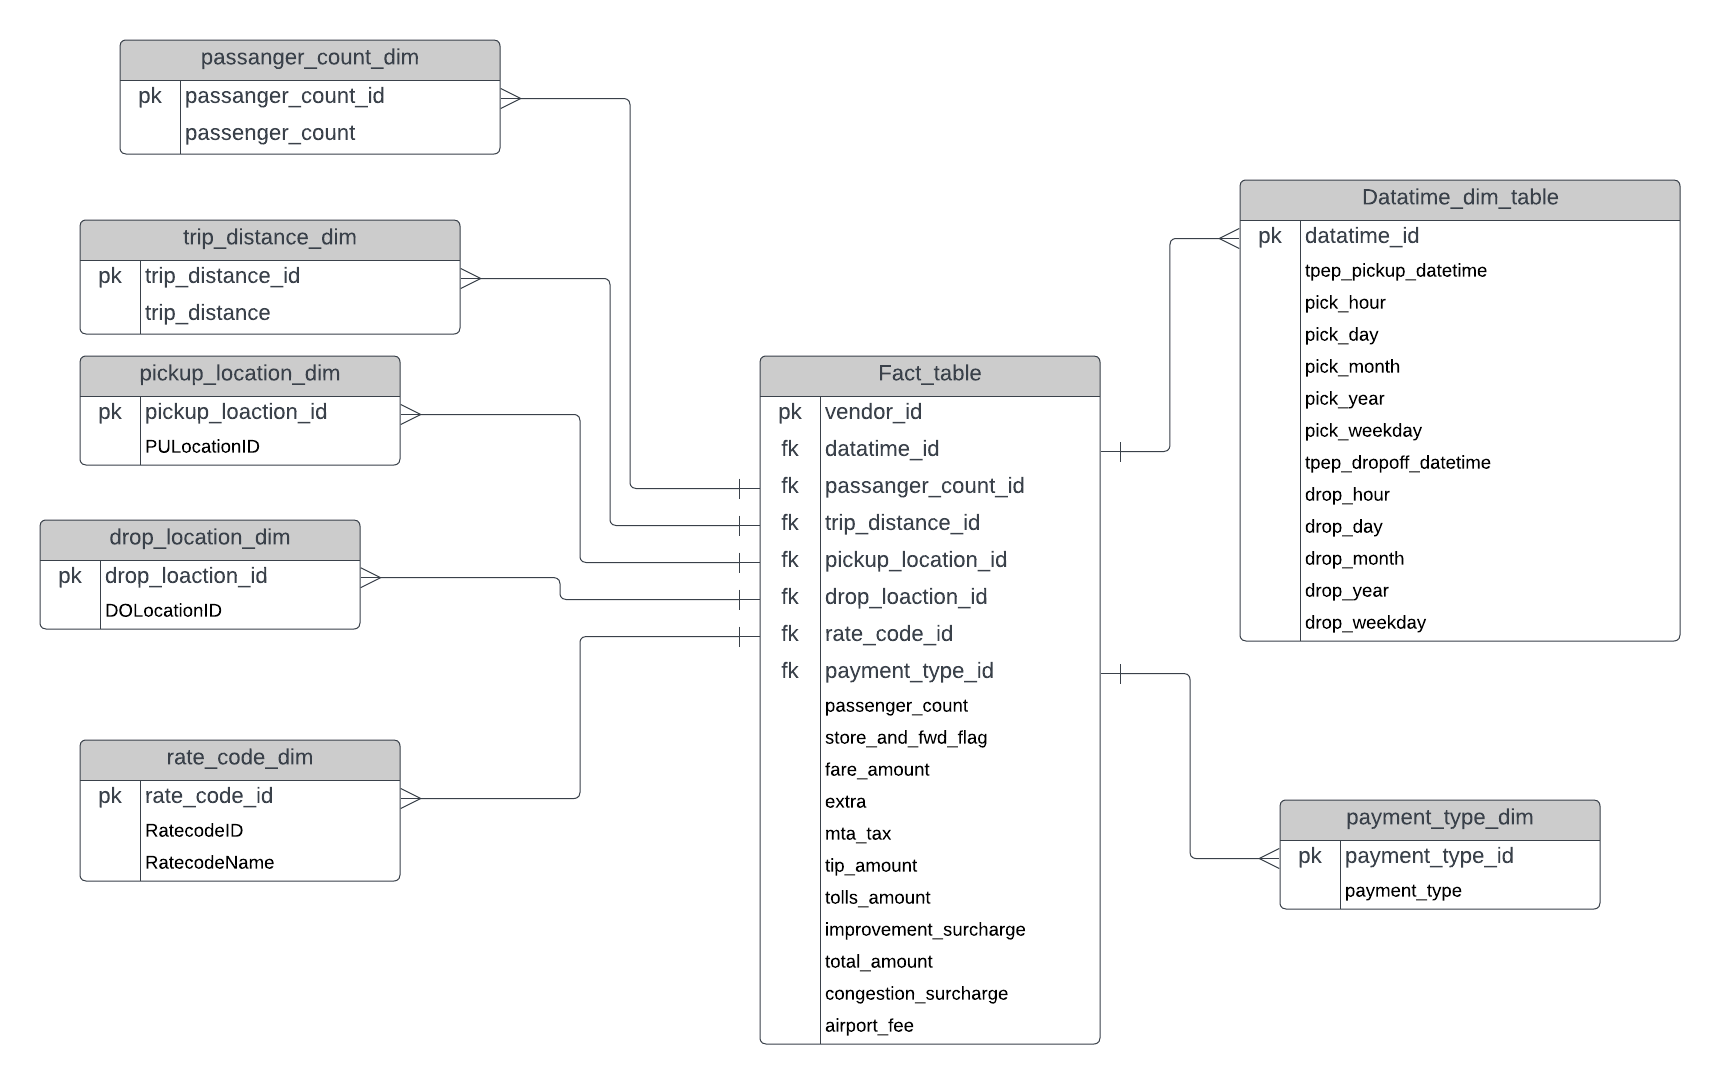

In [18]:
#droping dupliacte and assigning trip_id column index value
tripData = tripData.drop_duplicates().reset_index(drop=True)
tripData['trip_id'] = tripData.index

In [19]:
#Converting the object datetime column to date_time format
tripData['tpep_pickup_datetime'] = pd.to_datetime(tripData['tpep_pickup_datetime'])
tripData['tpep_dropoff_datetime'] = pd.to_datetime(tripData['tpep_dropoff_datetime'])

In [20]:
tripData.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_id
0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,249,107,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0,0
1,2,2022-10-01 00:14:30,2022-10-01 00:19:48,2.0,0.72,1.0,N,151,238,2,5.5,0.5,0.5,0.00,0.0,0.3,9.30,2.5,0.0,1
2,2,2022-10-01 00:27:13,2022-10-01 00:37:41,1.0,1.74,1.0,N,238,166,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.0,0.0,2
3,1,2022-10-01 00:32:53,2022-10-01 00:38:55,0.0,1.30,1.0,N,142,239,1,6.5,3.0,0.5,2.05,0.0,0.3,12.35,2.5,0.0,3
4,1,2022-10-01 00:44:55,2022-10-01 00:50:21,0.0,1.00,1.0,N,238,166,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,0.0,0.0,4


In [21]:
#Creating a dimension table for datatime

datetime_dim = tripData[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday
datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday
datetime_dim['datetime_id'] = datetime_dim.index

#Creating a dimension table for passenger_count
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

#Creating a dimension table for trip_distance
trip_distance_dim = tripData[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

#Creating a dimension table for pickup_location
pickup_location_dim = tripData[['PULocationID']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','PULocationID']] 

#Creating a dimension table for dropoff_location
dropoff_location_dim = tripData[['DOLocationID']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','DOLocationID']]

In [22]:
datetime_dim.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,datetime_id
0,2022-10-01 00:03:41,2022-10-01 00:18:39,0,1,10,2022,5,0,1,10,2022,5,0
1,2022-10-01 00:14:30,2022-10-01 00:19:48,0,1,10,2022,5,0,1,10,2022,5,1
2,2022-10-01 00:27:13,2022-10-01 00:37:41,0,1,10,2022,5,0,1,10,2022,5,2
3,2022-10-01 00:32:53,2022-10-01 00:38:55,0,1,10,2022,5,0,1,10,2022,5,3
4,2022-10-01 00:44:55,2022-10-01 00:50:21,0,1,10,2022,5,0,1,10,2022,5,4


In [23]:
#Ordering the column
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

In [25]:
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2022-10-01 00:03:41,0,1,10,2022,5,2022-10-01 00:18:39,0,1,10,2022,5
1,1,2022-10-01 00:14:30,0,1,10,2022,5,2022-10-01 00:19:48,0,1,10,2022,5
2,2,2022-10-01 00:27:13,0,1,10,2022,5,2022-10-01 00:37:41,0,1,10,2022,5
3,3,2022-10-01 00:32:53,0,1,10,2022,5,2022-10-01 00:38:55,0,1,10,2022,5
4,4,2022-10-01 00:44:55,0,1,10,2022,5,2022-10-01 00:50:21,0,1,10,2022,5


In [26]:
passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1.0
1,1,2.0
2,2,1.0
3,3,0.0
4,4,0.0


In [27]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,1.70
1,1,0.72
2,2,1.74
3,3,1.30
4,4,1.00


In [28]:
#mapping the rate code to different places 
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride",
    99:"Free"
}

payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    0:"Unknown",
}



In [29]:
rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['RatecodeID'].fillna(1, inplace=True)
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [30]:
payment_type_dim.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,2,Cash
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


In [31]:
rate_code_dim.tail()

,rate_code_id,RatecodeID,rate_code_name
3675406,3675406,1.0,Standard rate
3675407,3675407,1.0,Standard rate
3675408,3675408,1.0,Standard rate
3675409,3675409,1.0,Standard rate
3675410,3675410,1.0,Standard rate


In [32]:
#joing all the dimension tables on respective primary with fact table

fact_table = tripData.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']]

In [33]:
fact_table

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,0,0,0,0,N,0,0,0,9.50,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0
1,1,2,1,1,1,1,N,1,1,1,5.50,0.5,0.5,0.00,0.0,0.3,9.30,2.5,0.0
2,2,2,2,2,2,2,N,2,2,2,9.00,0.5,0.5,2.06,0.0,0.3,12.36,0.0,0.0
3,3,1,3,3,3,3,N,3,3,3,6.50,3.0,0.5,2.05,0.0,0.3,12.35,2.5,0.0
4,4,1,4,4,4,4,N,4,4,4,6.00,0.5,0.5,1.80,0.0,0.3,9.10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675405,3675405,2,3675405,3675405,3675405,3675405,None,3675405,3675405,3675405,12.68,0.0,0.5,3.16,0.0,0.3,19.14,NaN,NaN
3675406,3675406,2,3675406,3675406,3675406,3675406,None,3675406,3675406,3675406,10.00,0.0,0.5,1.00,0.0,0.3,14.30,NaN,NaN
3675407,3675407,2,3675407,3675407,3675407,3675407,None,3675407,3675407,3675407,19.07,0.0,0.5,4.97,0.0,0.3,27.34,NaN,NaN
3675408,3675408,2,3675408,3675408,3675408,3675408,None,3675408,3675408,3675408,16.82,0.0,0.5,4.58,0.0,0.3,22.20,NaN,NaN


In [34]:
#checking which colums contain NaN
fact_table.isna().any()

trip_id                  False
VendorID                 False
datetime_id              False
passenger_count_id       False
trip_distance_id         False
rate_code_id             False
store_and_fwd_flag        True
pickup_location_id       False
dropoff_location_id      False
payment_type_id          False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
dtype: bool

In [ ]:
print(fact_table.store_and_fwd_flag.value_counts())
fact_table.store_and_fwd_flag.unique()

In [ ]:
fact_table.congestion_surcharge.unique()

In [ ]:
fact_table.airport_fee.unique()

In [ ]:
fact_table['airport_fee'].fillna(0, inplace=True)
fact_table['congestion_surcharge'].fillna(0, inplace=True)
fact_table['store_and_fwd_flag'].fillna('N', inplace=True)

In [ ]:
fact_table.head()

In [ ]:
import pandas as pd
if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    #droping dupliacte and assigning trip_id column index value
    tripData = data.drop_duplicates().reset_index(drop=True)
    tripData['trip_id'] = tripData.index

    #Converting the object datetime column to date_time format
    tripData['tpep_pickup_datetime'] = pd.to_datetime(tripData['tpep_pickup_datetime'])
    tripData['tpep_dropoff_datetime'] = pd.to_datetime(tripData['tpep_dropoff_datetime'])
    
    #Creating a dimension table for datatime

    datetime_dim = tripData[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
    datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
    datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
    datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
    datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
    datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday
    datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
    datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
    datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
    datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
    datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
    datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday
    datetime_dim['datetime_id'] = datetime_dim.index

    #Creating a dimension table for passenger_count
    passenger_count_dim = tripData[['passenger_count']].reset_index(drop=True)
    passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
    passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

    #Creating a dimension table for trip_distance
    trip_distance_dim = tripData[['trip_distance']].reset_index(drop=True)
    trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
    trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

    #Creating a dimension table for pickup_location
    pickup_location_dim = tripData[['PULocationID']].reset_index(drop=True)
    pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
    pickup_location_dim = pickup_location_dim[['pickup_location_id','PULocationID']] 

    #Creating a dimension table for dropoff_location
    dropoff_location_dim = tripData[['DOLocationID']].reset_index(drop=True)
    dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
    dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','DOLocationID']]

    #Ordering the column
    datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
    
    #mapping the rate code to different places 
    rate_code_type = {
        1:"Standard rate",
        2:"JFK",
        3:"Newark",
        4:"Nassau or Westchester",
        5:"Negotiated fare",
        6:"Group ride",
        99:"Free"
    }

    payment_type_name = {
        1:"Credit card",
        2:"Cash",
        3:"No charge",
        4:"Dispute",
        0:"Unknown",
    }

    rate_code_dim = tripData[['RatecodeID']].reset_index(drop=True)
    rate_code_dim['rate_code_id'] = rate_code_dim.index
    rate_code_dim['RatecodeID'].fillna(1, inplace=True)
    rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
    rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

    payment_type_dim = tripData[['payment_type']].reset_index(drop=True)
    payment_type_dim['payment_type_id'] = payment_type_dim.index
    payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
    payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

    #joing all the dimension tables on respective primary with fact table

    fact_table = tripData.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
                .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
                .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
                .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
                .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
                .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
                .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
                [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
                'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
                'payment_type_id','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']]

    fact_table['airport_fee'].fillna(0, inplace=True)
    fact_table['congestion_surcharge'].fillna(0, inplace=True)
    fact_table['store_and_fwd_flag'].fillna('N', inplace=True)

    return {"datetime_dim":datetime_dim.to_dict(orient="dict"),
    "passenger_count_dim":passenger_count_dim.to_dict(orient="dict"),
    "trip_distance_dim":trip_distance_dim.to_dict(orient="dict"),
    "pickup_location_dim":pickup_location_dim.to_dict(orient="dict"),
    "dropoff_location_dim":dropoff_location_dim.to_dict(orient="dict"),
    "rate_code_dim":rate_code_dim.to_dict(orient="dict"),
    "payment_type_dim":payment_type_dim.to_dict(orient="dict"),
    "fact_table":fact_table.to_dict(orient="dict")
    }

@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
"""
    Template for loading data from API
    """
    url = 'https://storage.googleapis.com/uber_data_pipeline/Data/yellow_tripdata.parquet'
    response = requests.get(url)

    Data = pd.read_parquet(url, engine='pyarrow')
    return pd.DataFrame(Data)